# 1. GPU Setup
Menu > 'Runtime' > 'Change runtime type' and select 'GPU' as Hardware Accelator
# 2. Mount Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
!ls

gdrive	sample_data


# 3. Install CUDA related modules, cuDNN
Download cuDNN file https://developer.nvidia.com/rdp/cudnn-download

Unzip the cuDNN from Google Drive to Colab /usr/local/cuda folder

In [3]:
!/usr/local/cuda/bin/nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2021 NVIDIA Corporation
Built on Sun_Feb_14_21:12:58_PST_2021
Cuda compilation tools, release 11.2, V11.2.152
Build cuda_11.2.r11.2/compiler.29618528_0


In [5]:
!tar -xzvf /content/gdrive/MyDrive/darknet/cuDNN/cudnn-11.2-linux-x64-v8.1.1.33.tgz -C /usr/local/
!chmod a+r /usr/local/cuda/include/cudnn.h

cuda/include/cudnn.h
cuda/include/cudnn_adv_infer.h
cuda/include/cudnn_adv_infer_v8.h
cuda/include/cudnn_adv_train.h
cuda/include/cudnn_adv_train_v8.h
cuda/include/cudnn_backend.h
cuda/include/cudnn_backend_v8.h
cuda/include/cudnn_cnn_infer.h
cuda/include/cudnn_cnn_infer_v8.h
cuda/include/cudnn_cnn_train.h
cuda/include/cudnn_cnn_train_v8.h
cuda/include/cudnn_ops_infer.h
cuda/include/cudnn_ops_infer_v8.h
cuda/include/cudnn_ops_train.h
cuda/include/cudnn_ops_train_v8.h
cuda/include/cudnn_v8.h
cuda/include/cudnn_version.h
cuda/include/cudnn_version_v8.h
cuda/NVIDIA_SLA_cuDNN_Support.txt
cuda/lib64/libcudnn.so
cuda/lib64/libcudnn.so.8
cuda/lib64/libcudnn.so.8.1.1
cuda/lib64/libcudnn_adv_infer.so
cuda/lib64/libcudnn_adv_infer.so.8
cuda/lib64/libcudnn_adv_infer.so.8.1.1
cuda/lib64/libcudnn_adv_train.so
cuda/lib64/libcudnn_adv_train.so.8
cuda/lib64/libcudnn_adv_train.so.8.1.1
cuda/lib64/libcudnn_cnn_infer.so
cuda/lib64/libcudnn_cnn_infer.so.8
cuda/lib64/libcudnn_cnn_infer.so.8.1.1
cuda/lib64/

In [6]:
!cat /usr/local/cuda/include/cudnn.h | grep CUDNN_MAJOR -A 2

# 4. Install DarkNet
DarkNet Install https://pjreddie.com/darknet/install/

In [7]:
!git clone https://github.com/alexeyab/darknet
%cd darknet

Cloning into 'darknet'...
remote: Enumerating objects: 15494, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 15494 (delta 0), reused 1 (delta 0), pack-reused 15490
Receiving objects: 100% (15494/15494), 14.11 MiB | 19.26 MiB/s, done.
Resolving deltas: 100% (10409/10409), done.
/content/darknet


In [8]:
!ls

3rdparty		darknet_video.py       net_cam_v4.sh
build			data		       README.md
build.ps1		image_yolov3.sh        results
cfg			image_yolov4.sh        scripts
cmake			include		       src
CMakeLists.txt		json_mjpeg_streams.sh  vcpkg.json
DarknetConfig.cmake.in	LICENSE		       video_yolov3.sh
darknet_images.py	Makefile	       video_yolov4.sh
darknet.py		net_cam_v3.sh


In [9]:
!git checkout feature/google-colab

error: pathspec 'feature/google-colab' did not match any file(s) known to git.


In [10]:
# Compile DarkNet
!make

mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -c ./src/image_opencv.cpp -o obj/image_opencv.o
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -c ./src/http_stream.cpp -o obj/http_stream.o
./src/http_stream.cpp: In member function ‘bool JSON_sender::write(const char*)’:
./src/http_stream.cpp:253:21: warning: unused variable ‘n’ [-Wunused-variable]
                 int n = _write(client, outputbuf, outlen);
                     ^
./src/http_stream.cpp: In function ‘void set_track_id(detection*, int, float, float, float, int, int, int)’:
./src/http_stream.cpp:867:27: warning: comparison between signed and unsigned integer expressions [-Wsign-compare]
         for (int i = 0; i < v.size(); ++i) {
                         ~~^~~~~~~~~~
./src/http_stream.cpp:875:33: warning: c

In [11]:
import os
if not os.path.exists('/content/gdrive/My Drive/darknet/bin'):
    os.makedirs('/content/gdrive/My Drive/darknet/bin')

In [12]:
!cp ./darknet /content/gdrive/My\ Drive/darknet/bin/darknet

In [13]:
# Use compiled darkent in your Google Drive after the first compile
# 1. Makes a darknet directory
#!mkdir darknet
#%cd darknet

# 2. Copy the Darkent compiled version to the VM
#!cp /content/gdrive/My\ Drive/darknet/bin/darknet ./darknet

# 3. Set execution permissions
#!chmod +x ./darknet

In [14]:
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  #plt.rcParams['figure.figsize'] = [10, 5]
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()
  
  
def upload():
  from google.colab import files
  uploaded = files.upload() 
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)
def download(path):
  from google.colab import files
  files.download(path)

In [15]:
%ls

3rdparty/               darknet.py              net_cam_v4.sh*
backup/                 darknet_video.py        obj/
build/                  data/                   README.md
build.ps1*              image_yolov3.sh*        results/
cfg/                    image_yolov4.sh*        scripts/
cmake/                  include/                src/
CMakeLists.txt          json_mjpeg_streams.sh*  vcpkg.json
darknet*                LICENSE                 video_yolov3.sh*
DarknetConfig.cmake.in  Makefile                video_yolov4.sh*
darknet_images.py       net_cam_v3.sh*


In [16]:
!cp -r "/content/gdrive/My Drive/darknet/weights" ./weights

In [17]:
%ls

3rdparty/               darknet.py              net_cam_v4.sh*
backup/                 darknet_video.py        obj/
build/                  data/                   README.md
build.ps1*              image_yolov3.sh*        results/
cfg/                    image_yolov4.sh*        scripts/
cmake/                  include/                src/
CMakeLists.txt          json_mjpeg_streams.sh*  vcpkg.json
darknet*                LICENSE                 video_yolov3.sh*
DarknetConfig.cmake.in  Makefile                video_yolov4.sh*
darknet_images.py       net_cam_v3.sh*          weights/


# 5. Test YOLO

 GPU isn't used 
 OpenCV isn't used - data augmentation will be slow 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 104 x 104 x 128 0.001 BF
   9 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
  10 conv    128  

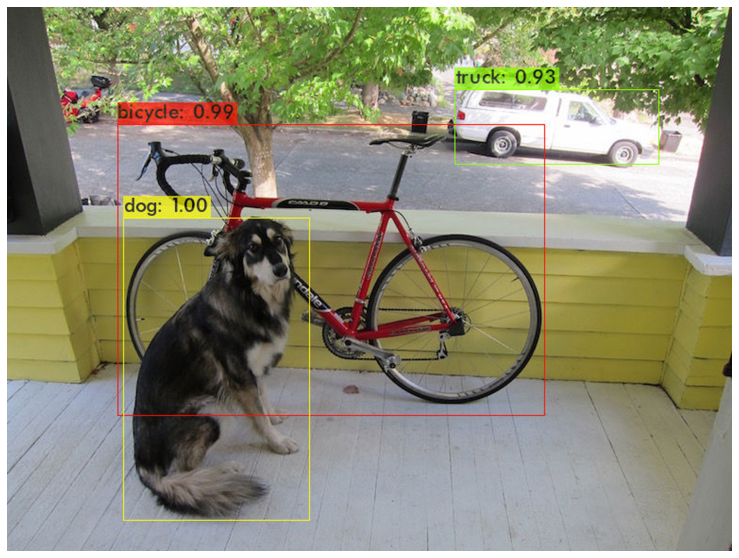

In [18]:
!./darknet detect cfg/yolov3.cfg weights/yolov3.weights data/dog.jpg
imShow('predictions.jpg')